In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy
from hc_lib.plots.fig_lib import FigureLibrary
tngpath = '/lustre/cosinga/L75n1820TNG/'
basepath = '/lustre/cosinga/hcolor/fig_md_analysis/'

In [2]:
fsr = hp.File(basepath+'HIXgalaxy/HIxGal_fieldnameR_spaceC_redshift.hdf5', 'r')
rfc = hp.File(basepath+'HIXgalaxy/HIxGal_redshiftR_fieldnameC_color.hdf5', 'r')
head = il.groupcat.loadHeader(tngpath+'output/', 99)


In [3]:
fnlabels = ['D18-Particle, Real Space', 'D18-Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
fnvnlabels = ['HI Particle, Real Space', 'HI Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
fnvnshort = ['$\\rho_{HI}^r(\overrightarrow{x_{\mathrm{ptl}}})$', 
            '$\\rho_{HI}^s(\overrightarrow{x_{\mathrm{ptl}}})$',
            '$\\rho_{D18}^s(\overrightarrow{x_{\mathrm{gal}}})$']
fnshort = ['$\\rho_{D18}^r(\overrightarrow{x_{\mathrm{ptl}}})$', 
            '$\\rho_{D18}^s(\overrightarrow{x_{\mathrm{ptl}}}$',
            '$\\rho_{D18}^s(\overrightarrow{x_{\mathrm{gal}}})$']
rslabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']

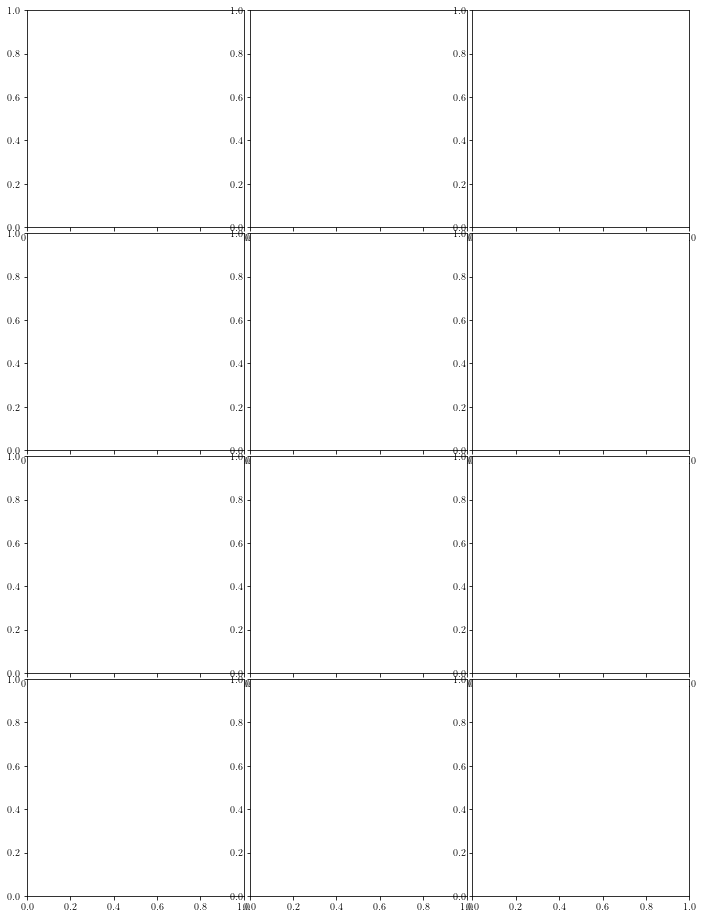

In [4]:
# first figure
nrows = 4
ncols = 3
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [5]:
print(fsr.keys())
print(len(fsr.keys()))

<KeysViewHDF5 ['0 0 0 x', '0 0 0 y', '0 0 1 x', '0 0 1 y', '0 0 10 x', '0 0 10 y', '0 0 11 x', '0 0 11 y', '0 0 2 x', '0 0 2 y', '0 0 3 x', '0 0 3 y', '0 0 4 x', '0 0 4 y', '0 0 5 x', '0 0 5 y', '0 0 6 x', '0 0 6 y', '0 0 7 x', '0 0 7 y', '0 0 8 x', '0 0 8 y', '0 0 9 x', '0 0 9 y', '0 1 0 x', '0 1 0 y', '0 1 1 x', '0 1 1 y', '0 1 10 x', '0 1 10 y', '0 1 11 x', '0 1 11 y', '0 1 2 x', '0 1 2 y', '0 1 3 x', '0 1 3 y', '0 1 4 x', '0 1 4 y', '0 1 5 x', '0 1 5 y', '0 1 6 x', '0 1 6 y', '0 1 7 x', '0 1 7 y', '0 1 8 x', '0 1 8 y', '0 1 9 x', '0 1 9 y', '1 0 0 x', '1 0 0 y', '1 0 1 x', '1 0 1 y', '1 0 10 x', '1 0 10 y', '1 0 11 x', '1 0 11 y', '1 0 12 x', '1 0 12 y', '1 0 13 x', '1 0 13 y', '1 0 14 x', '1 0 14 y', '1 0 15 x', '1 0 15 y', '1 0 16 x', '1 0 16 y', '1 0 17 x', '1 0 17 y', '1 0 18 x', '1 0 18 y', '1 0 19 x', '1 0 19 y', '1 0 2 x', '1 0 2 y', '1 0 20 x', '1 0 20 y', '1 0 21 x', '1 0 21 y', '1 0 22 x', '1 0 22 y', '1 0 23 x', '1 0 23 y', '1 0 24 x', '1 0 24 y', '1 0 25 x', '1 0 25 y',

In [6]:
def get_match(props):
    keys = fsr.keys()
    matches = []
    for k in keys:
        is_match = True
        if 'x' in k:
            for p,v in props.items():
                try:
                    lval = fsr[k].attrs[p]
                    
                    is_match = (is_match and v in lval)
                except KeyError:
                    continue
            if is_match:
                matches.append(k)
    return matches

In [7]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[j], 'space':spaces[j], 'redshift':redshifts[i]}
        keys_for_panels[i,j] = get_match(props)


In [8]:
flib.logAxis('both')

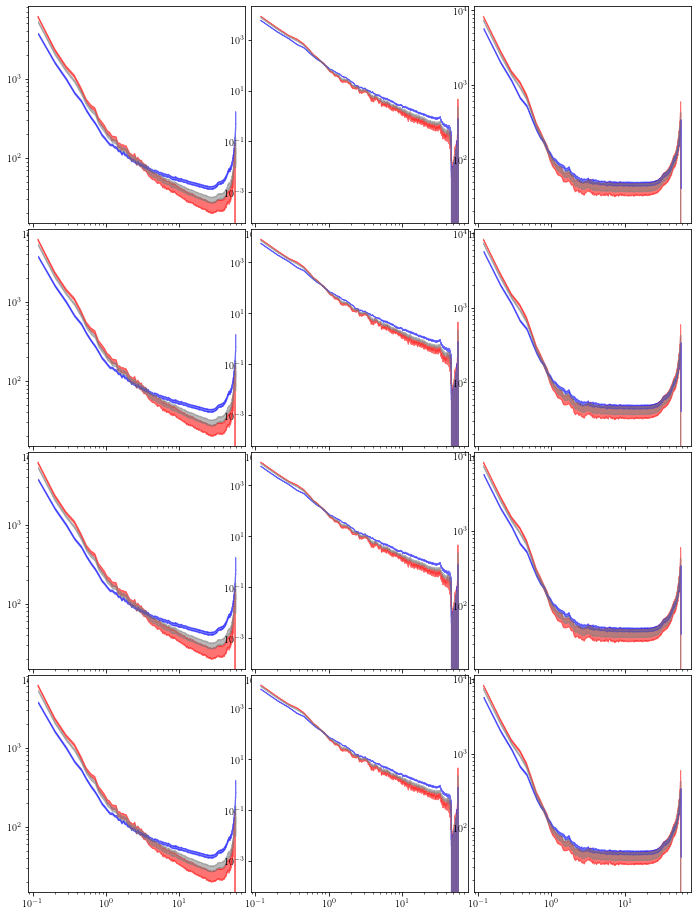

In [9]:

for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='red')

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='blue')

        # plot all
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'resolved' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray')
fig

In [10]:
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()
rowlabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']
flib.addRowLabels(rowlabels)
collabels = ['D18-Particle, Real Space', 'D18-Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
flib.addColLabels(collabels)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend()

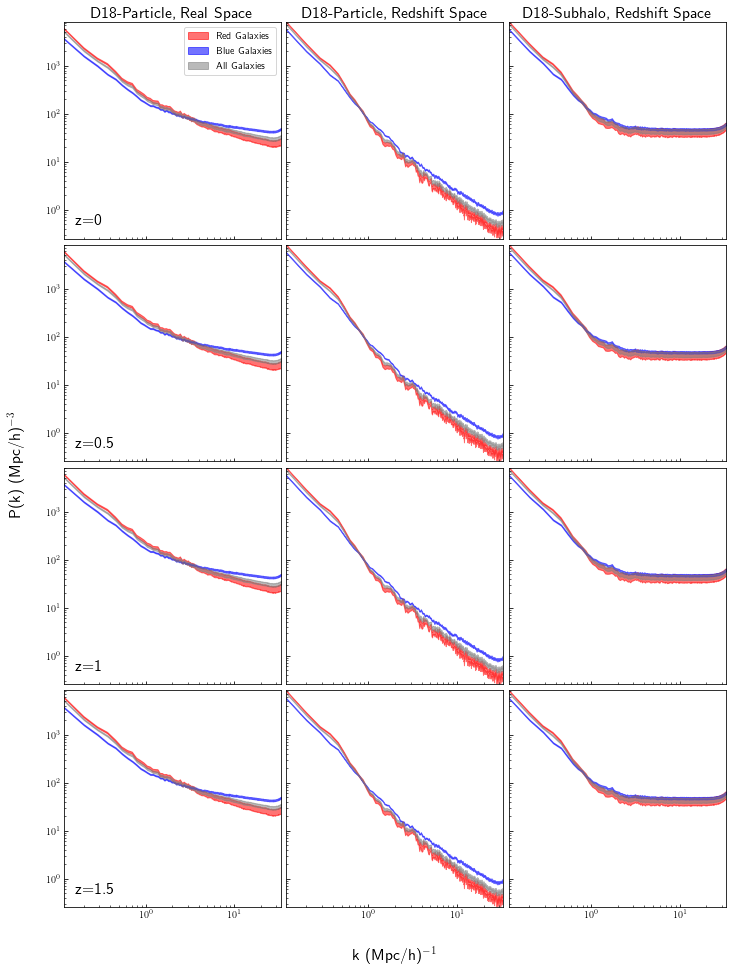

In [11]:
fig.savefig('HIXGAL_redshiftR_fieldnameC_color.png')
fig

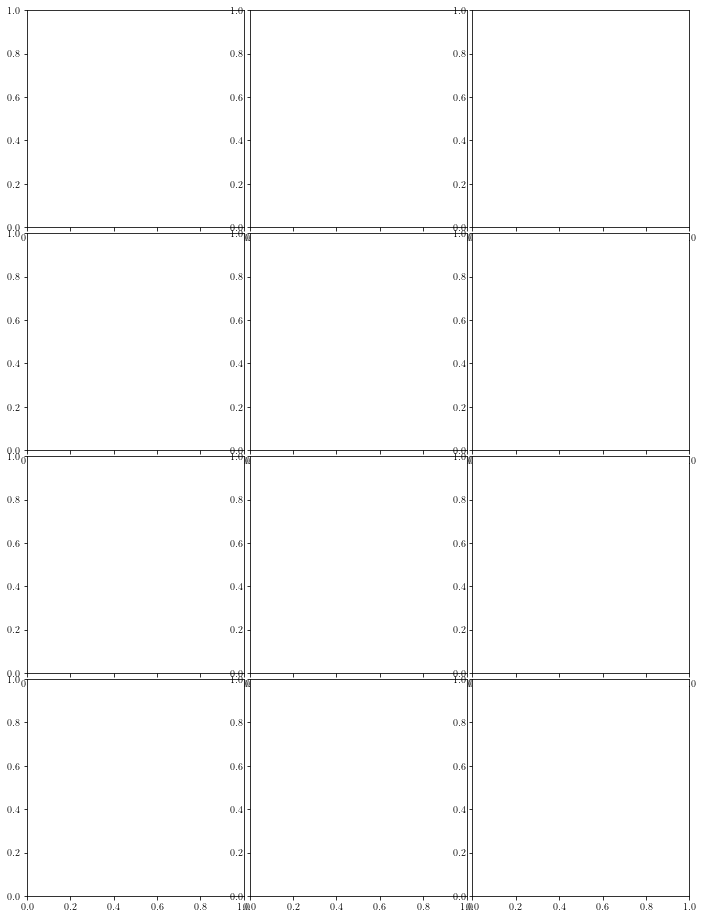

In [12]:
# first figure, with VN18
nrows = 4
ncols = 3
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [13]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[j], 'space':spaces[j], 'redshift':redshifts[i]}
        keys_for_panels[i,j] = get_match(props)
        if fieldnames[j] == 'hiptl':
            vnprops = copy.copy(props)
            vnprops['fieldname'] = 'vn'
            keys_for_panels[i,j].extend(get_match(vnprops))


In [14]:
for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='red')

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='blue')

        # plot all
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'resolved' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray')


In [15]:
flib.logAxis('both')
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()
rowlabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']
flib.addRowLabels(rowlabels)
collabels = ['HI Particles, Real Space', 'HI Particles, Redshift Space', 'D18-Subhalo, Redshift Space']
flib.addColLabels(collabels)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend()

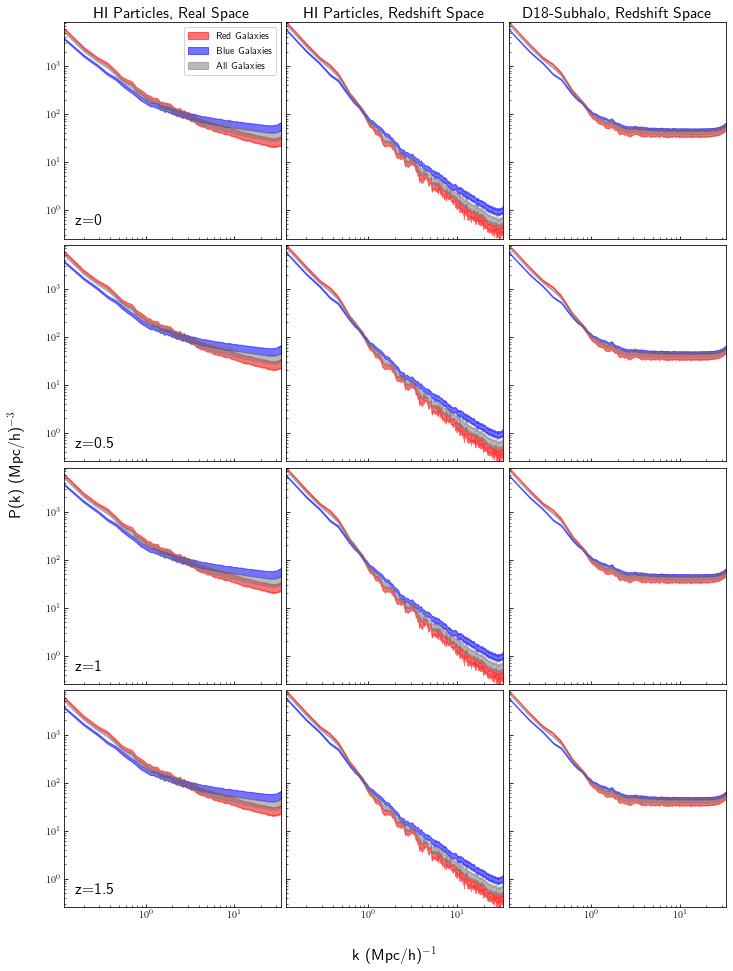

In [16]:
fig.savefig('HIXGAL_redshiftR_fieldnameC_color_with_vn.png')
fig

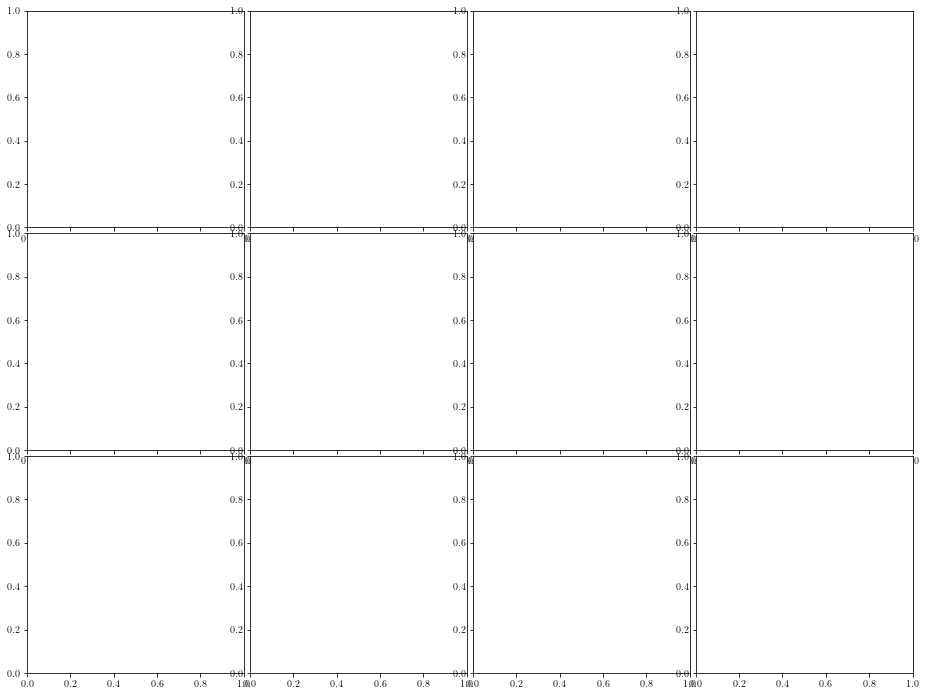

In [17]:
# These figures look kinda smeared, I'm going to try to flip them so they can share another axis
# less whitespace
nrows = 3
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [18]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[i], 'space':spaces[i], 'redshift':redshifts[j]}
        keys_for_panels[i,j] = get_match(props)
#         if fieldnames[j] == 'hiptl':
#             vnprops = copy.copy(props)
#             vnprops['fieldname'] = 'vn'
#             keys_for_panels[i,j].extend(get_match(vnprops))


In [19]:
for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='red')

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='blue')

        # plot all
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'resolved' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray')


In [20]:
flib.logAxis('both')
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()
collabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']
rowlabels = ['D18-Particle, Real Space', 'D18-Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
flib.addRowLabels(fnlabels, pos = (0.5,0.95), va = 'top', ha='center')

flib.addColLabels(rslabels)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend(loc='lower left')

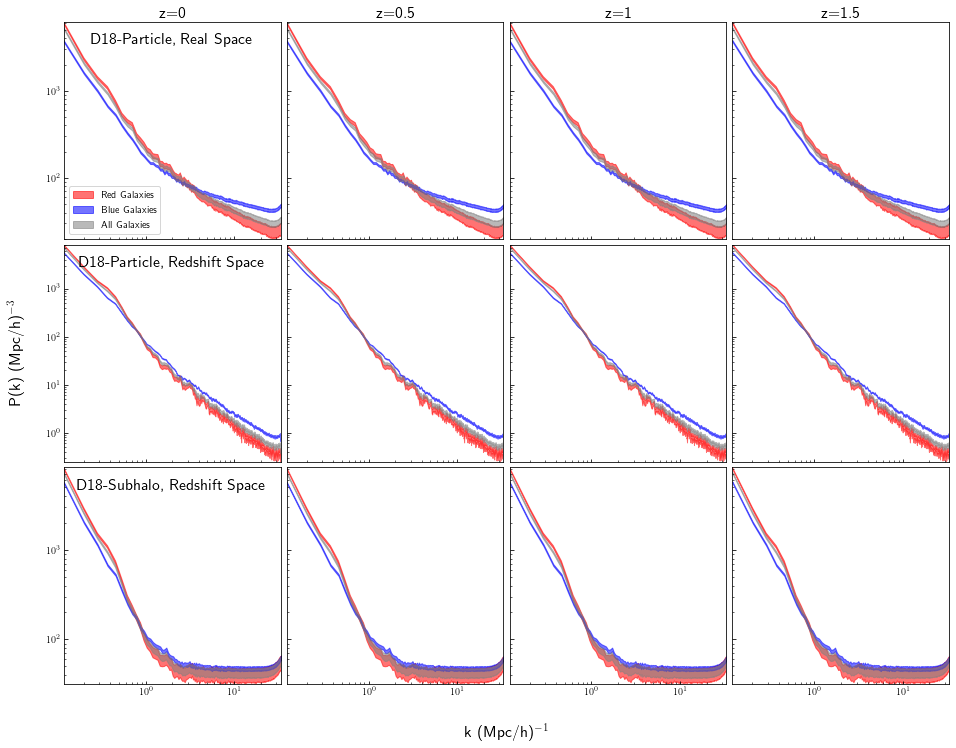

In [21]:
fig.savefig('HIXGAL_fieldnameR_redshiftC_color.png')
fig

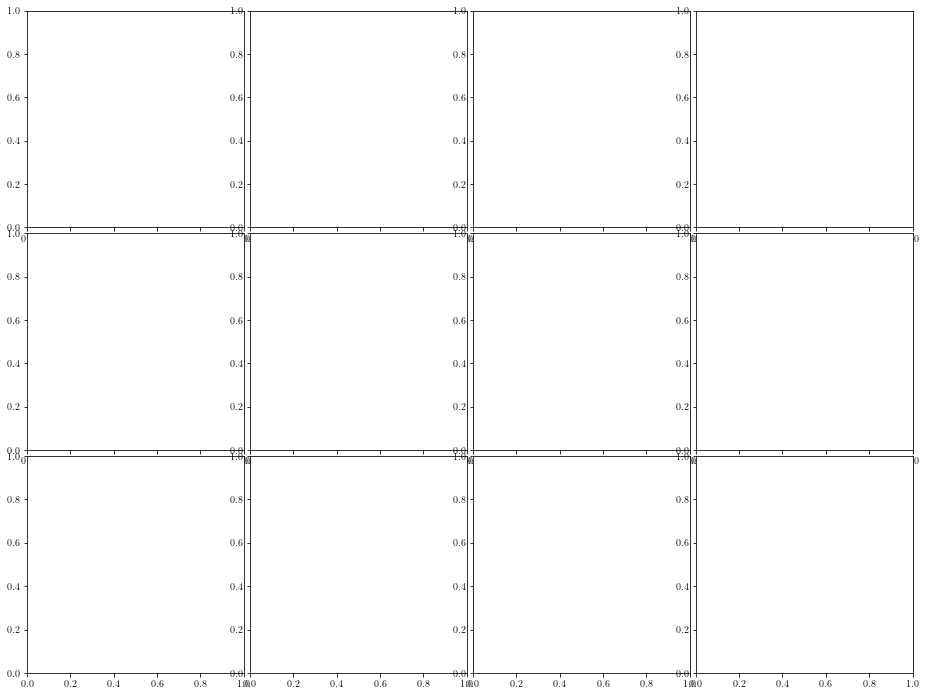

In [22]:
# Now with vn
nrows = 3
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [23]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[i], 'space':spaces[i], 'redshift':redshifts[j]}
        keys_for_panels[i,j] = get_match(props)
        if fieldnames[i] == 'hiptl':
            vnprops = copy.copy(props)
            vnprops['fieldname'] = 'vn'
            keys_for_panels[i,j].extend(get_match(vnprops))


In [24]:
for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='red')

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='blue')

#         # plot all
#         plot_pk = []
#         for k in keys:
#             wavenum = fsr[k]
#             pk_key = k[:-1] + 'y'
#             pk = fsr[pk_key]
#             if 'resolved' in wavenum.attrs['color']:
#                 plot_wn = wavenum[:]
#                 plot_pk.append(pk[:])
#         plot_pk = np.array(plot_pk)
#         flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray')


In [25]:
flib.logAxis('both')
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()
collabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']
rowlabels = ['HI Particle, Real Space', 'HI Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
flib.addRowLabels(fnvnshort, pos = (0.5, 0.95), va='top', ha='center')

flib.addColLabels(rslabels, in_panel=True, row_idx = 0)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend(panel_idx = (0,1) )

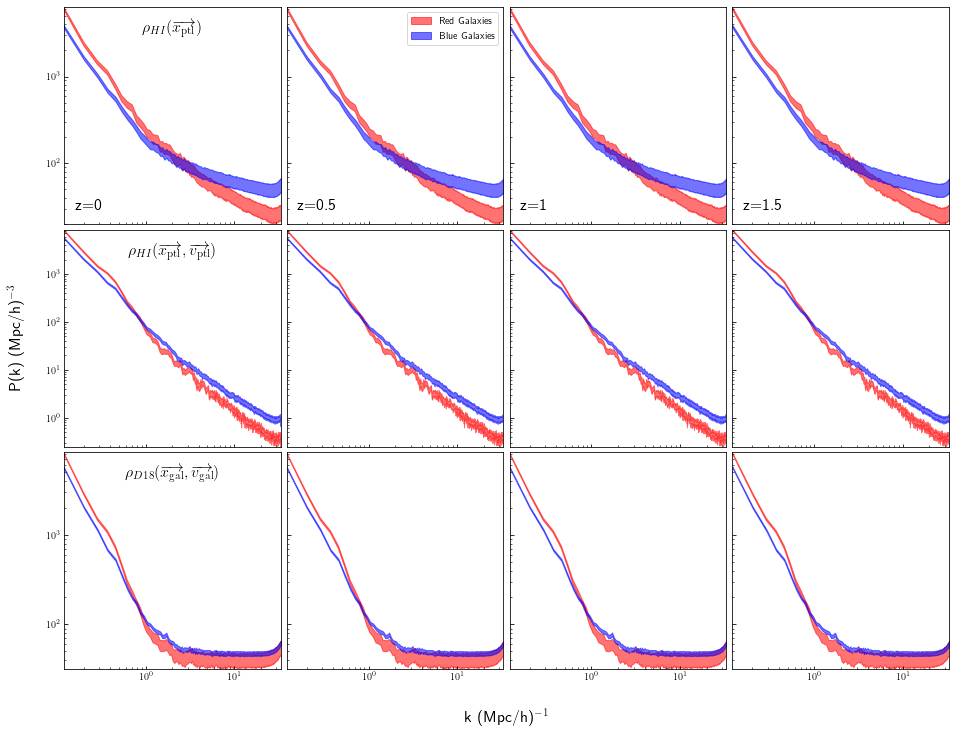

In [26]:
fig.savefig('HIXGAL_fieldnameR_redshiftC_color_with_vn.png')
fig

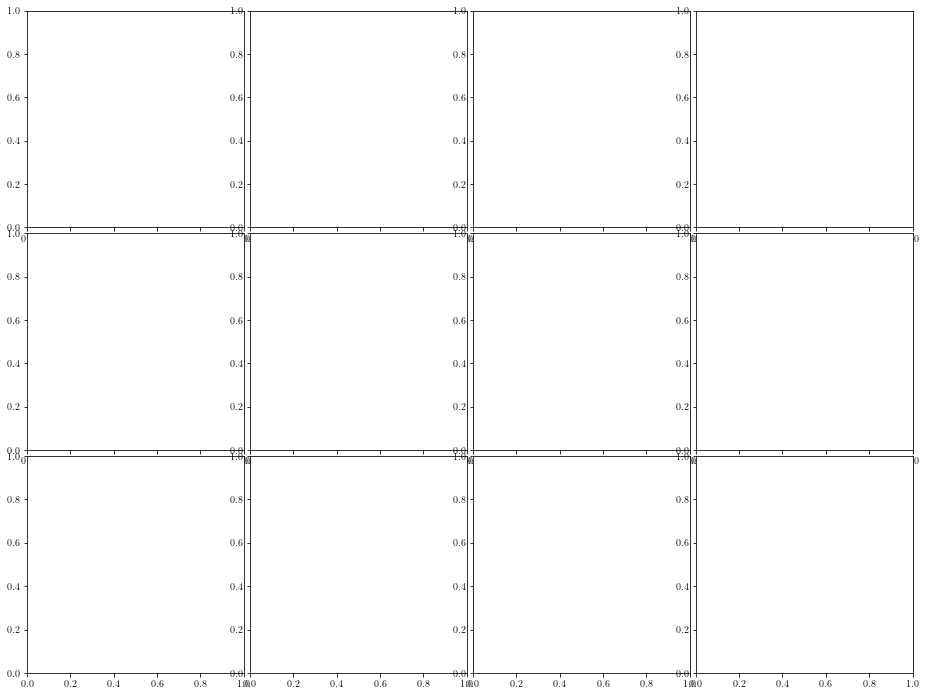

In [27]:
# Now with vn
nrows = 3
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [28]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[i], 'space':spaces[i], 'redshift':redshifts[j]}
        keys_for_panels[i,j] = get_match(props)
        if fieldnames[i] == 'hiptl':
            vnprops = copy.copy(props)
            vnprops['fieldname'] = 'vn'
            keys_for_panels[i,j].extend(get_match(vnprops))


In [29]:
for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='red')

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='blue')

        # plot all
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'resolved' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        
        plot_pk = np.array(plot_pk)
        mx = np.max(plot_pk, axis=0)
        mn = np.min(plot_pk, axis=0)
        #flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray')
        flib.plotLinePanel(idx, wavenum, mx, color='black', linestyle='--')
        flib.plotLinePanel(idx, wavenum, mn, label = 'All Galaxies',color='black', linestyle='--')


In [30]:
flib.logAxis('both')
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()
collabels = ['z=0', 'z=0.5', 'z=1', 'z=1.5']
rowlabels = ['HI Particle, Real Space', 'HI Particle, Redshift Space', 'D18-Subhalo, Redshift Space']
flib.addRowLabels(rowlabels, pos = (0.1, 0.9))

flib.addColLabels(collabels)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend(loc='lower left')

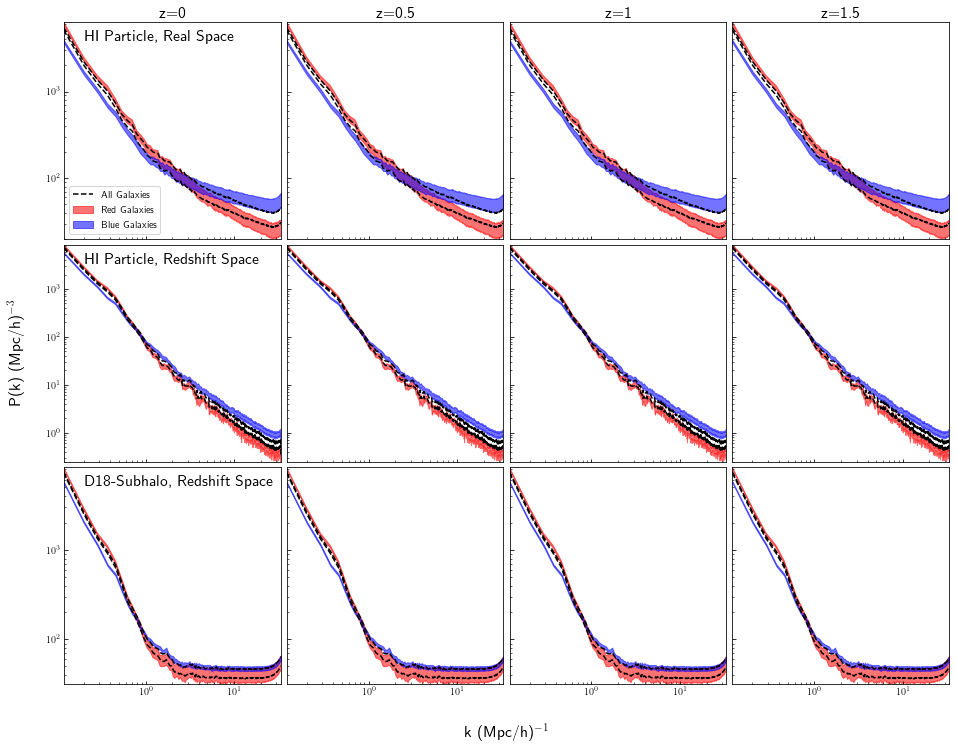

In [31]:
fig.savefig('HIXGAL_dashed_try.png')
fig

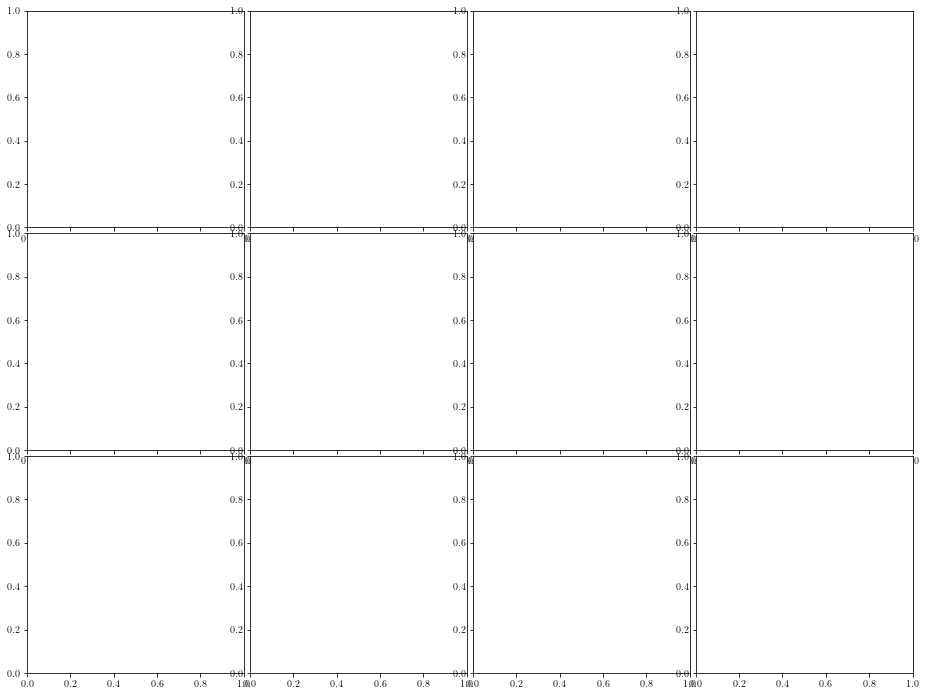

In [32]:
# Now with vn
nrows = 3
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [33]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

z0 = fsr['0 0 0 x'].attrs['redshift']
fieldnames = ['hiptl','hiptl','hisubhalo']
spaces = ['real', 'redshift','redshift']
# CHANGE WHEN MORE REDSHIFTS ARE CALCULATED
redshifts = [z0, z0, z0, z0]
for i in range(nrows):
    for j in range(ncols):
        props = {'fieldname':fieldnames[i], 'space':spaces[i], 'redshift':redshifts[j]}
        keys_for_panels[i,j] = get_match(props)
        if fieldnames[i] == 'hiptl':
            vnprops = copy.copy(props)
            vnprops['fieldname'] = 'vn'
            keys_for_panels[i,j].extend(get_match(vnprops))


In [34]:
for i in range(nrows):
    for j in range(ncols):
        idx = (i, j)
        keys = keys_for_panels[idx]

        # plot reds
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'red' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Red Galaxies', color='salmon', opacity=0.4, dark_edges=True)

        # plot blues
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'blue' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'Blue Galaxies', color='cyan', opacity=0.4, dark_edges=True)

        # plot all
        plot_pk = []
        for k in keys:
            wavenum = fsr[k]
            pk_key = k[:-1] + 'y'
            pk = fsr[pk_key]
            if 'resolved' in wavenum.attrs['color']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        
        plot_pk = np.array(plot_pk)
        mx = np.max(plot_pk, axis=0)
        mn = np.min(plot_pk, axis=0)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'All Galaxies', color='gray', opacity = 0.4, dark_edges=True)



In [35]:
flib.logAxis('both')
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
flib.has_cbar_col = False

flib.xLimAdjustToNyquist(gridres=800, box=box, xleft=mink)
flib.flushYAxisToData()
flib.removeDefaultTickLabels()

flib.addRowLabels(fnvnshort, pos = (0.5, 0.95), va = 'top', ha = 'center')

flib.addColLabels(rslabels)
flib.changeTickDirection()
flib.defaultAxesLabels()
flib.matchAxisLimits()
flib.addLegend((0,1))

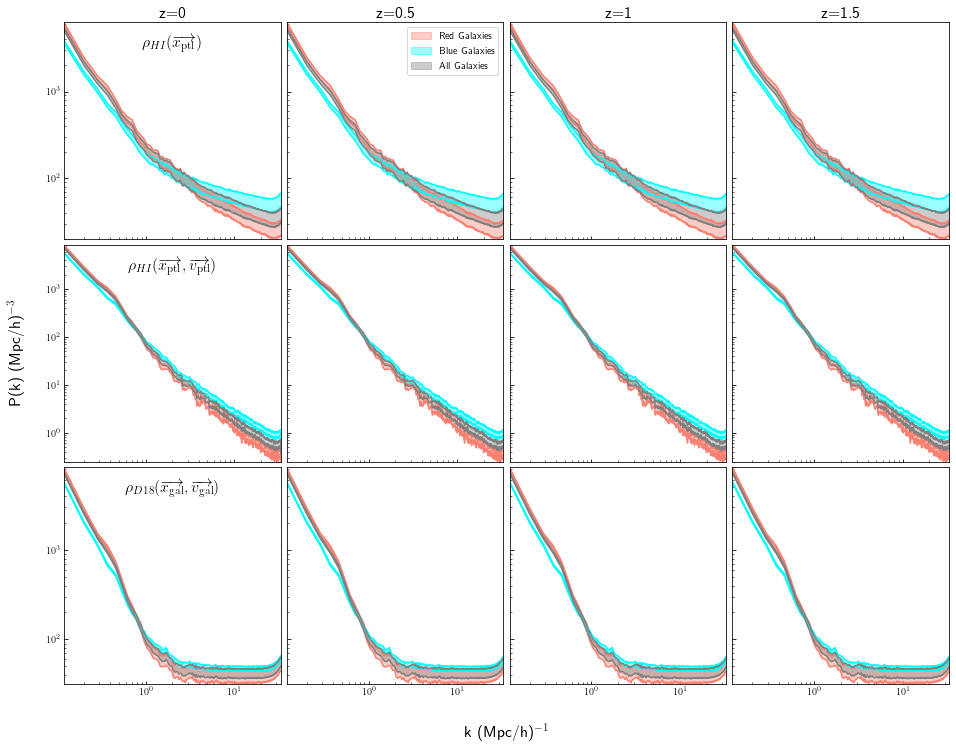

In [36]:
fig

In [37]:
fig.savefig('HIXGAL_low_alpha_washed_colors.png')